# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a critical step in data analysis that involves understanding a dataset's characteristics. It helps uncover patterns, trends, relationships, and anomalies to gain insights. EDA is performed by data scientists or analysts and is done early in the analysis process. It takes place in a data analysis environment and involves techniques like visualization, summary statistics, and correlation analysis. EDA helps identify data issues, form hypotheses, and guide decision-making. It is essential for understanding data before further analysis or modeling.
### Import the Required Libraries
In this step, we imort the necessary libraries for performing EDA. These libraries, including pandas, numpy, seaborn, and matplotlib, provide prowerful tools for data manipulation, analysis, and visualization.
Importing these libraries is the first step to ensure we have the necessary tools to explore and gain insights from the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Load the Dataset
In this step, we parse the datetime column as a datetime type, which allows us to perform various temporal operations and analysis on the data.

In [2]:
df = pd.read_csv('currency_data_10_years.csv', parse_dates=['date'])


The `parse_dates` parameter ensures that the datetime column is correctly parsed as datetime objects.
### Check the Dataset Structure
By using the `head()` and `tail()` method, we can examine the first few rows and last feaw rows of the DataFrame to ensure the data is loaded correctly and confirm the format of the datetime and value columns. This step helps us verify that the dataset matches our expectations and provides a glimpse of the data's contents.

In [3]:
df.head()

,date,EUR,USD,JPY,GBP,SGD,AUD,CNY,CAD,MYR,RUB
0,2013-05-01,12816.661099,9721.95011,99.794970,15125.789759,7884.025975,9991.932116,1573.729510,9637.238781,3196.705985,311.579294
1,2013-05-02,12696.355896,9727.31307,99.371194,15096.787469,7878.089194,9976.629029,1576.636811,9620.049518,3193.114711,311.787545
2,2013-05-03,12735.428571,9726.93828,98.682506,15125.784565,7879.444847,10024.671009,1576.977359,9628.439345,3201.788787,312.272389
3,2013-05-04,12758.622548,9729.21521,98.372041,15148.170100,7886.016560,10037.051582,1577.842772,9643.293465,3204.827462,313.177271
4,2013-05-05,12719.240307,9697.65758,97.852512,15097.625177,7859.545641,9999.337595,1572.747845,9623.460698,3195.832412,312.291932


In [4]:
df.tail()

,date,EUR,USD,JPY,GBP,SGD,AUD,CNY,CAD,MYR,RUB
3648,2023-04-27,16209.481958,14693.927814,109.821954,18363.255081,11006.712235,9743.131115,2122.230600,10804.374576,3292.381399,179.522330
3649,2023-04-28,16327.538019,14673.574745,107.649159,18443.198537,10987.310199,9706.330826,2122.847288,10747.108066,3289.664483,182.393384
3650,2023-04-29,16327.528027,14673.565765,107.638817,18451.257845,10988.126246,9696.280669,2122.846296,10747.880805,3289.662470,182.393270
3651,2023-04-30,16152.482580,14670.023881,107.559654,18421.208189,10987.942405,9699.881962,2122.366433,10818.785187,3288.867679,182.349365
3652,2023-05-01,16098.499876,14677.018435,106.712659,18322.202251,10979.160369,9719.609412,2123.377747,10829.294348,3225.003875,181.871063


### Handle Missing Values
In this step, we check for missing values within the dataset using `isnull()` and `sum()`. Handling missing values is crucial to ensure the accuracy and integrity of the analysis. We have the option to either drop the rows with missing values using `dropna()` or use `fillna()` to fill missing values.

In [5]:
print(df.isnull().sum())
df = df.fillna(df.mean(numeric_only=True))

date    0
EUR     0
USD     0
JPY     0
GBP     0
SGD     0
AUD     0
CNY     0
CAD     0
MYR     0
RUB     0
dtype: int64


If there are missing values in the dataset, this step prints the number of missing values for each column instead of 0.

### Perform Statistical Summary
Statistical summary provides a concise overview of the distribution and central tendencies of the data. By using the `describe()` method, we obtain statistical measures such as mean, standard deviation, minimum, maximum, and quartiles for the value column.

In [6]:
df.describe()

,EUR,USD,JPY,GBP,SGD,AUD,CNY,CAD,MYR,RUB
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,15734.162882,13626.586201,121.401374,18653.481260,10082.717169,10260.649080,2069.300203,10754.881120,3404.138908,231.530939
std,1028.194122,1215.902129,10.240113,1282.776928,714.681696,449.989173,140.321208,530.164824,173.826533,46.941534
min,12502.789487,9697.657580,94.607603,14719.776369,7717.296664,8937.081757,1572.747845,9357.856739,2975.634017,102.737302
25%,15022.483609,13190.926920,113.522422,17928.531116,9568.972790,9936.471898,1980.528819,10411.948518,3302.096195,201.594311
50%,15801.743633,13912.643820,120.609803,18781.087788,10247.419202,10276.735571,2091.106976,10746.358863,3423.539036,219.833077
75%,16463.962255,14384.106330,129.598188,19469.502233,10588.733799,10609.276367,2177.005363,11165.293022,3529.477813,237.545901
max,18035.467645,16644.718800,153.504275,22488.120204,11718.909446,11396.359940,2346.805612,12314.949757,3819.207831,384.795234


- __count__, demonstrates the dataset's size and the amount of available data
- __mean__, tt serves as a reference point for understanding the central tendency of the data.
- __std__, all of the data have smaller standard deviation suggests a narrow range of values, indicating non-potential fluctuations or volatility in the dataset.
- __min&max__, this range allows us to understand the boundaries within which the data exists.
- __quartiles__, the relatively close values of Q1, Q2, and Q3 suggest a somewhat symmetrical distribution or a moderate level of skewness in the dataset.

### Visualize the Data
In this step, we create a line plot to visualize the relationship between the datetime and value columns. By visualizing the data, we can identify trends, patterns, and potential outliers.

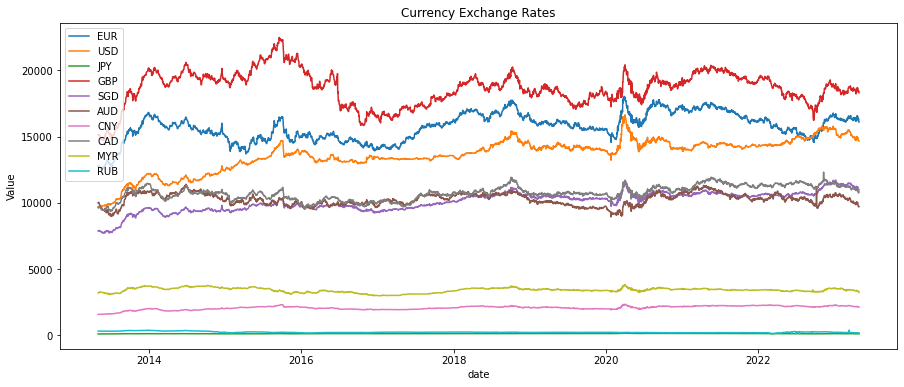

In [7]:
def visualize_data(column):
    plt.figure(figsize=(15, 6))
    for i in range(1, len(column)):
        plt.plot(df[column[0]], df[column[i]], label=column[i])
    plt.xlabel(column[0])
    plt.ylabel('Value')
    plt.title('Currency Exchange Rates')
    plt.legend()
    plt.show()

column_names = df.columns.tolist()
visualize_data(column_names)


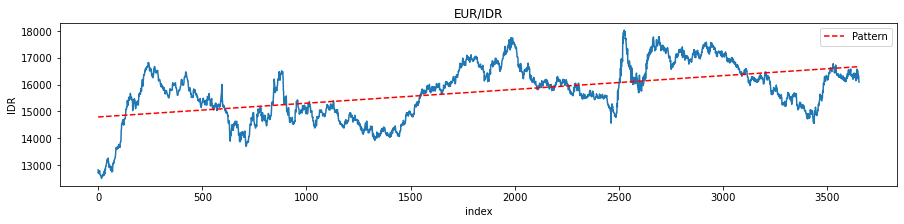

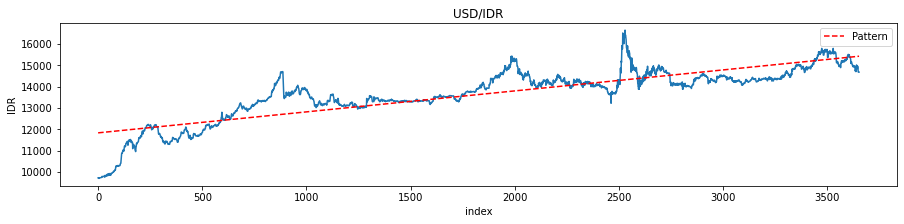

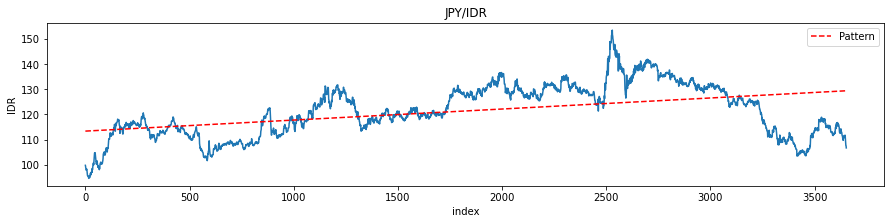

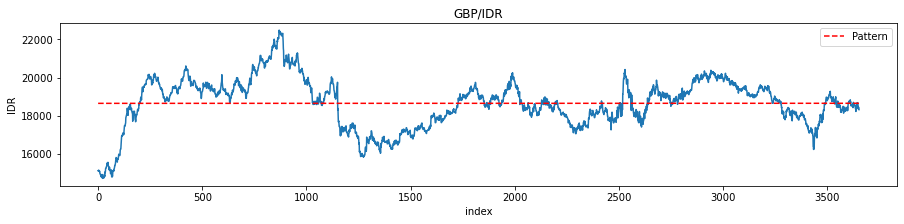

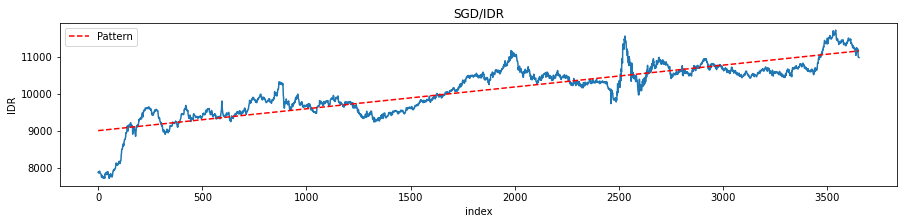

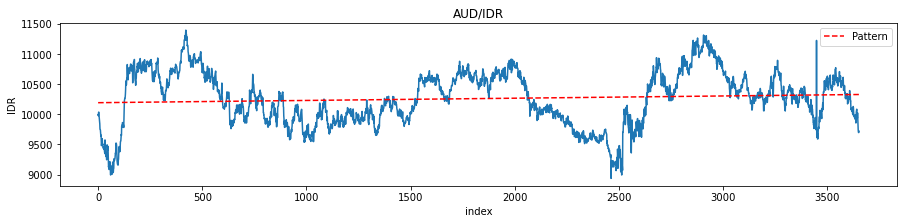

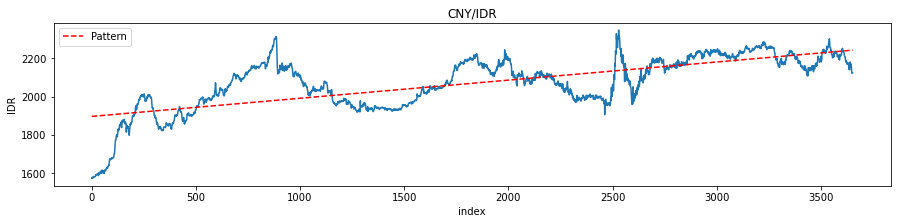

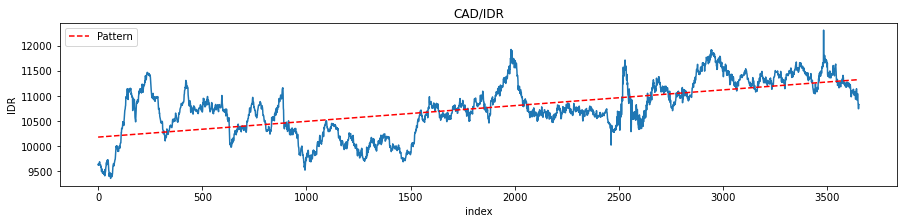

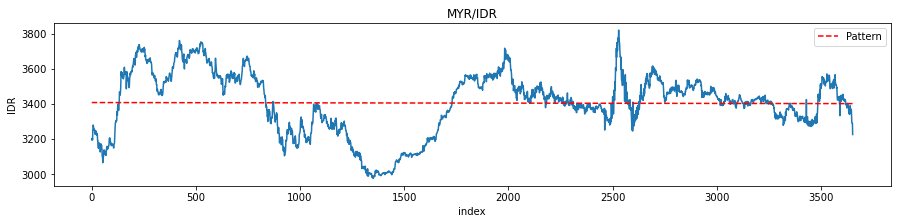

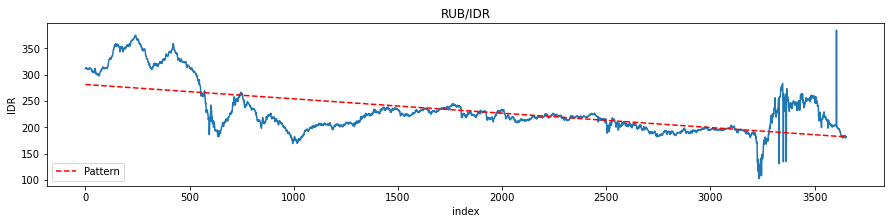

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

def visualize_each_data(column):
    for i in range(1, len(column)):
        x = df.index
        y = df[column[i]]
        
        plt.figure(figsize=(15, 3))

        # Plot the data
        plt.plot(x, y)
        plt.xlabel('index')
        plt.ylabel('IDR')
        plt.title(f'{column[i]}/IDR')

        # Identify trends
        trend = np.polyfit(x, y, 1)
        trend_line = np.poly1d(trend)
        plt.plot(x, trend_line(x), color='red', linestyle='--', label='Pattern')

        plt.legend()
        plt.show()

visualize_each_data(column_names)


After analyzing the graph and identifying trends, patterns, and potential outliers, we can draw the following insights:

- Trends & Pattern: The graph displays fluctuations in the value column over time. There is a noticeable pattern where the IDR (Indonesian Rupiah) appears to be stronger around 2017 and weaker around 2020. This suggests that there might be external factors influencing the currency exchange rates during those time periods. The graph exhibits a recurring pattern in the fluctuation of the exchange rates. Overall, the trend for each currency exchange is upward/downward or flat which indicate the inflation/deflation and stable.

### Potential Outliers
We create a box plot to identify any outliers or anomalies in the value column. The plot helps visualize the distribution of values and highlights any data points that deviate significantly from the expected patterns. Outliers represent data points that deviate significantly from the expected patterns. Detecting and investigating these outliers could help uncover exceptional events or errors in the dataset.

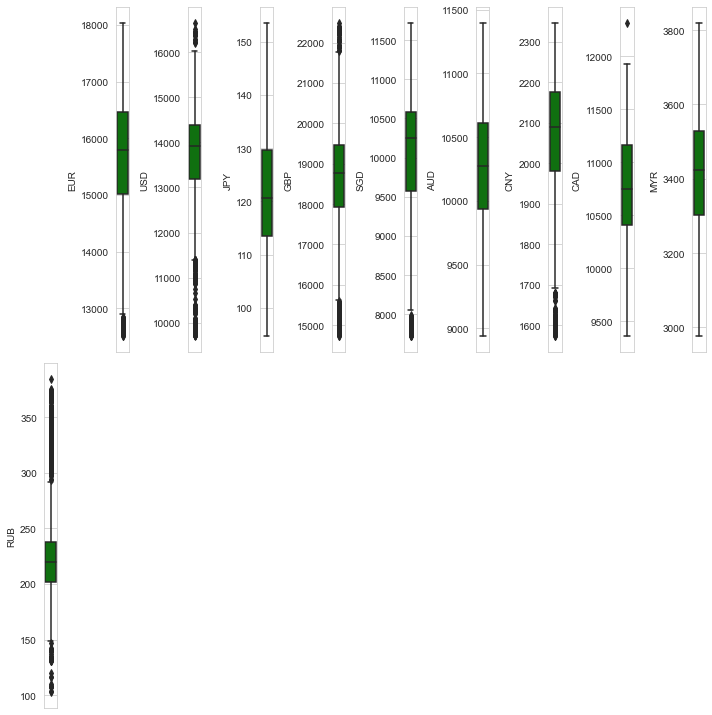

In [33]:
l = df.columns.values
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(1,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

- Except "MYR","AUD", and "JPY" all other features columns shows outliers.

### Distribution-Skewness
In EDA, we check the distribution and skewness of the data to gain insights into its overall shape and symmetry. The distribution provides information about the spread and concentration of the data values, while skewness measures the asymmetry of the distribution.

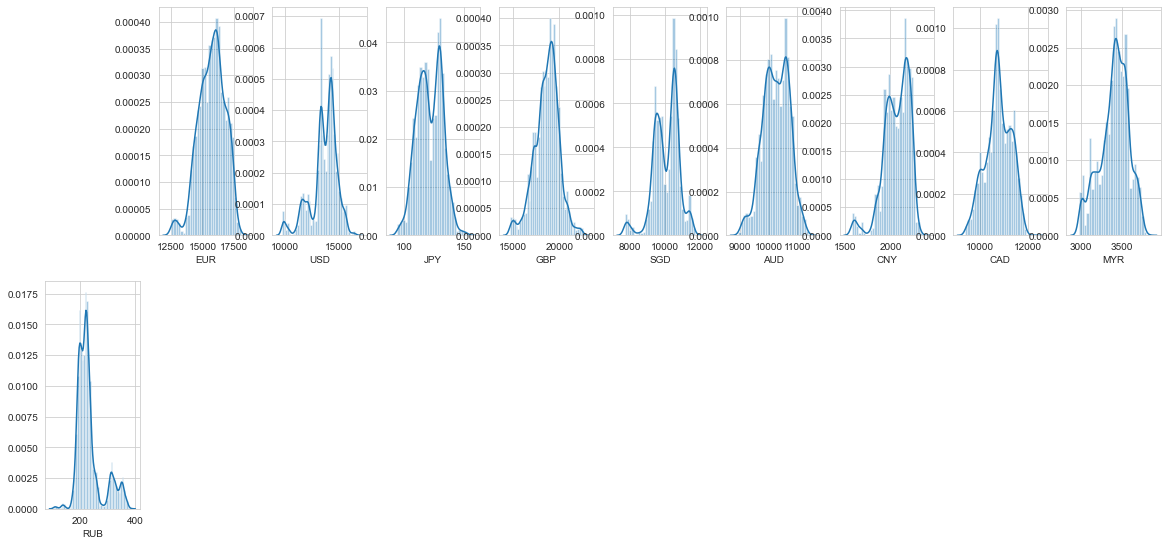

In [34]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(1,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Distribution: By examining the distribution, we can determine whether the data follows a specific pattern, such as a normal distribution or skewed distribution. Common distribution shapes include symmetric (bell-shaped), positively skewed (long tail on the right), and negatively skewed (long tail on the left).
Skewness: Skewness measures the deviation from symmetry in the distribution. A skewness value of 0 indicates a perfectly symmetric distribution. Positive skewness (>0) indicates a longer tail on the right, suggesting the presence of outliers or a right-skewed distribution. Negative skewness (<0) indicates a longer tail on the left, indicating a left-skewed distribution.
- "GBP" column appears to be normally distributed
- remaining all independent variables are right skewed/positively skewed.